In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
HUNT_PRICE = pd.read_csv('HUNT/price.csv')
HUNT_TVL = pd.read_csv('HUNT/TVL.csv')
HUNT_PRICE['market_cap'] = HUNT_PRICE['huntprice'] * HUNT_TVL['0']

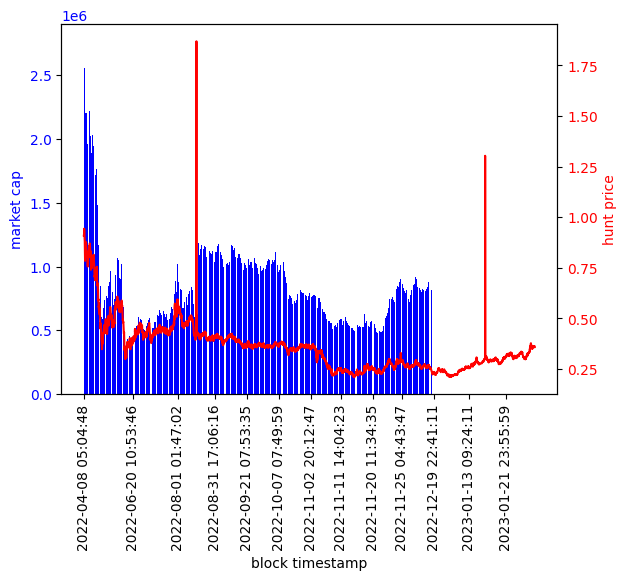

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and a set of subplots
fig, ax1 = plt.subplots()

# Plot the data on the first set of y-axes
ax1.bar(HUNT_PRICE['block_timestamp'], HUNT_PRICE['market_cap'], color='b')
ax1.set_xlabel('block timestamp')
ax1.set_ylabel('market cap', color='b')
ax1.tick_params(axis='y', labelcolor='b')
plt.xticks(HUNT_PRICE['block_timestamp'][::500], rotation=90)


# Create a second set of y-axes with the same x-axis
ax2 = ax1.twinx()

# Plot the data on the second set of y-axes
ax2.plot(HUNT_PRICE['block_timestamp'], HUNT_PRICE['huntprice'], color='r')
ax2.set_ylabel('hunt price', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Show the plot
plt.show()
